# Introduction

Customer churn analytics are critical in the any competitive industry. `When customers abandon a service for a competitor, companies not only lose revenue but also must spend more on acquiring new customers.` As a result, companies leverage customer data analytics to understand what drives churn and boost customer loyalty. The **Telco Customer Churn** project utilizes data on over 7,000 customer profiles, and by scrutinizing this data, telecom companies can uncover churn drivers, tailor retention strategies, and optimize customer interactions.

This project has four key phases:

1.	Briefly overview the dataset and describe its key information.
2.	Perform exploratory data analysis to summarize main characteristics and visualize variable distributions.
3.	Develop a predictive model to forecast churn, enabling proactive outreach to retain customers
4.	Synthesize findings to conclude the main drivers of churn and propose data-driven recommendations to mitigate it.

In essence, customer analytics is the systematic examination of a company's customer information and behavior to identify, attract, and retain the most profitable customers. It involves the process of collecting and analyzing customer data to gain insights on customer behavior, which can be used to make informed business decisions related to marketing, product development, sales, and more. 


# Dataset Description & Overview

The Telco customer churn dataset contains information on 7,048 customers, including a churn label indicating whether a customer ended service. The 20 features provide insights into customer demographics, account details (services and add-ons), and billing information. Below is a description of the features in the Telco customer churn dataset, grouping them into the following categories:

**Demographics** 
- Gender: Male or Female customers
- SeniorCitizen: Boolean indicating if aged 65+ 
- Dependents: If customer has other dependents on account
- Partner: If customer has partner

**Account details**
- Tenuer: length of time (months) customer has been with the company
- PhoneService: Has phone service 
- MultipleLines: Multiple phone lines
- InternetService: Type of internet service (DSL, Fiber optic, No internet)
- OnlineSecurity: Online security add-on  
- OnlineBackup: Online backup service add-on
- DeviceProtection: Device protection add-on 
- TechSupport: Technical support add-on
- StreamingTV: TV streaming add-on
- StreamingMovies: Movie streaming add-on  

**Billing**
- Contract: Contract term 
- PaperlessBilling: If paperless billing enabled
- PaymentMethod: How the customer pays their bill (electronic check, mailed check, bank transfer, credit card) 
- MonthlyCharges: Monthly charge amount
- TotalCharges: Total charges to date 

This feature categorization **(Demographics, Account details, and Billing)** provides a framework to conduct a thorough analysis. 

## Dataset Overview

In [69]:
# Importing libraries for data management and plotting
import pandas as pd               # Importing pandas for data manipulation
import matplotlib.pyplot as plt   # Importing matplotlib for basic plotting
import seaborn as sns             # Importing seaborn for statistical data visualization


In [101]:
# Reading a CSV file into a pandas DataFrame
df=pd.read_csv('../data/telco_customer_churn.csv')

In [71]:
# Displaying the first few rows of the DataFrame 'df' to quickly inspect the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [72]:
# Displaying concise information about the DataFrame 'df', including data types, non-null counts, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [109]:
# Changing SeniorCitizen data type to object for exploratory data analysis as it is categorical value.
# Mapping its values from 1 and 0 to Yes and No.
df['SeniorCitizen']=df['SeniorCitizen'].map({1:'Yes', 0:'No'})

In [74]:
# Calculating and displaying the sum of missing values (NaN) for each column in the DataFrame 'df'
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [75]:
# Filtering rows in the DataFrame 'df' that contain at least one missing value (NaN) across any column
df[df.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [106]:
df.dropna(inplace=True)

In [110]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [111]:
df.iloc[:,1:].describe(include='object').T

,count,unique,top,freq
gender,7032,2,Male,3549
SeniorCitizen,7032,2,No,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


### Dataset Overview Summary

Data for a telecommunications company including 7043 customers. The dataset shows 21 data fields, with details on customer demographics, services purchased, billing and charges, and whether they churned.

Summary statistics for numerical features:

- tenure (average 32 months)
- monthly charges (average $65)
- total charges (average $2283). Note there are 11 rows with NaN values in the TotalCharges feature.

Category data fields indicating customers:

- are even gender distributed, most customers are not seniors, don't have partners or dependents.
- do have phone and internet service.
- don't purchase most additional services.
- are on month-to-month contracts.
- use electronic check to pay.
- do not churn. "imbalanced dataset as they a big majority (70%)"


# Exploratory Data Analysis

### Customer Demographics 
`Gender, SeniorCitizen, Partner, Dependents`

These features provide insights into who the customers are. Understanding demographic patterns in churn can reveal underserved customer segments.

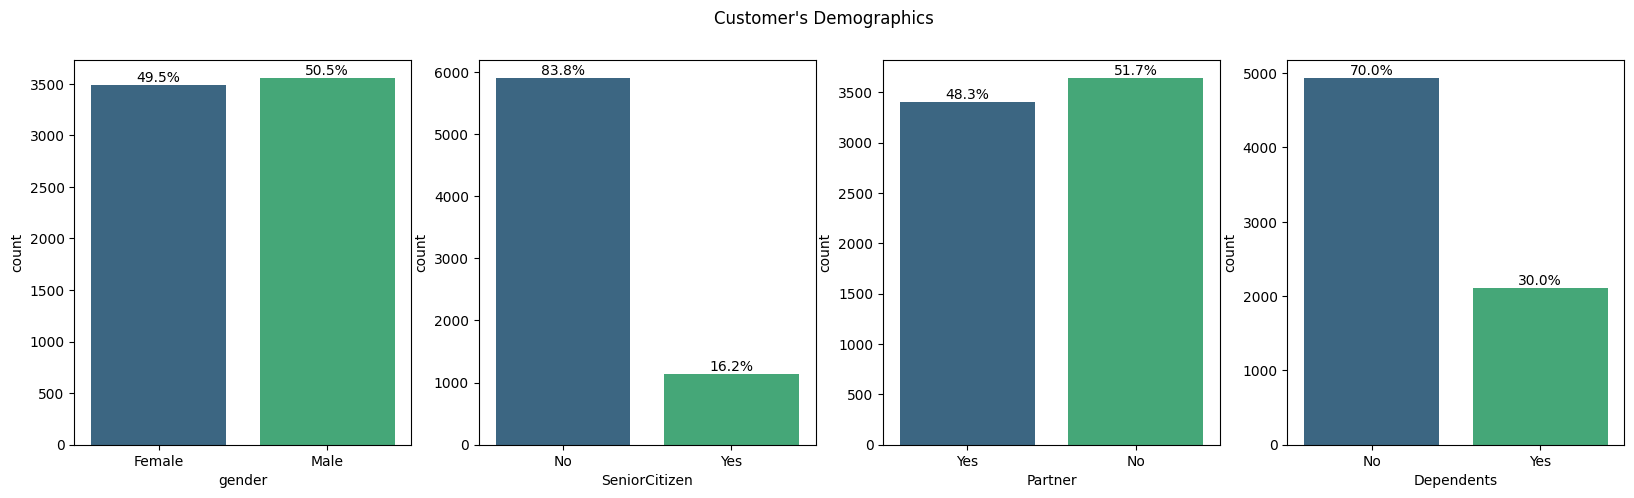

In [10]:
customer_demographics = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Charts, and plots color
color = "viridis"

fig = plt.figure(figsize=(20,5))
fig.tight_layout()
for i in range(len(customer_demographics)):
    ax = plt.subplot(1, 4, i + 1)
    sns.countplot(data=df, x=customer_demographics[i], palette=color, hue=customer_demographics[i], legend=False)

    # Add percentage labels to each bar
    total_height = len(df[customer_demographics[i]])  # total number of data points
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_height)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

fig.suptitle("Customer's Demographics");

- The customer demographics show an even gender split of around 50%. This indicates your products/services likely appeal equally to men and women.
- Most customers are not seniors at 83.8% under age 65, meaning the majority potentially have different preferences than the 16.2% senior group.
- Marital status also seems equally divided between those partnered or single. This demonstrates a diverse customer base in terms of household dynamics.
- Additionally, 70% do not have dependents versus 30% with. This implies the majority may have more disposable income and fewer financial obligations.

Potential opportunities:

1. Monitor changes in gender mix over time to identify shifts that could impact satisfaction.
2. Segment by age brackets to tailor offerings to groups like seniors.
3. Study how marital status and dependents influence spending and loyalty.



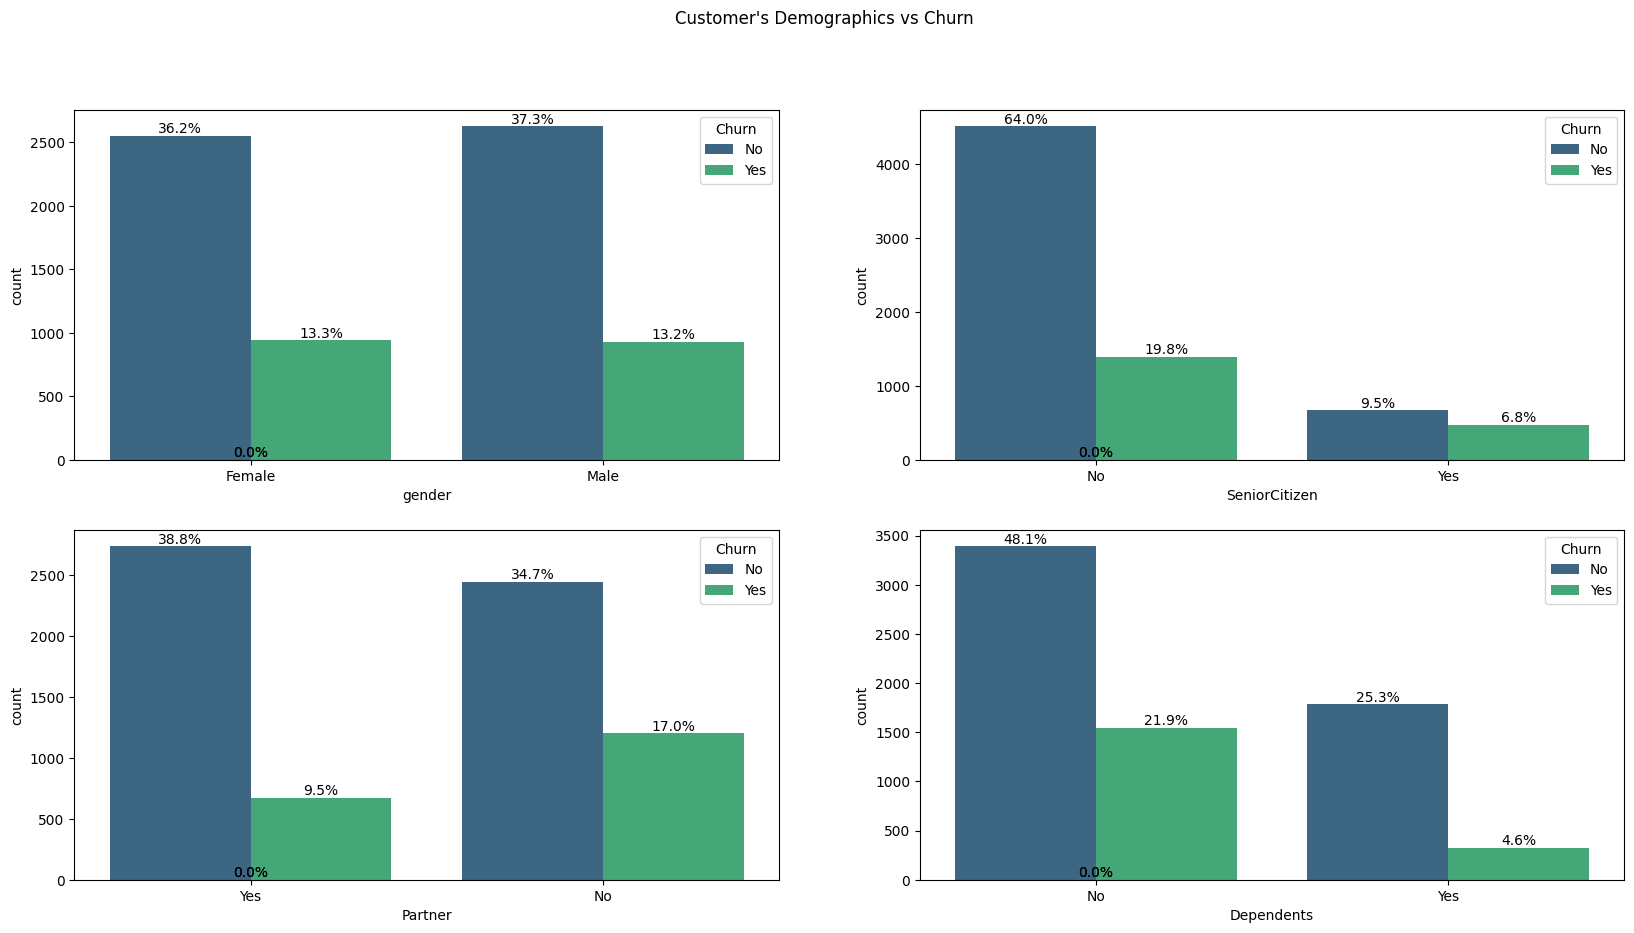

In [9]:
customer_demographics = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

fig = plt.figure(figsize=(20,10))
fig.tight_layout()
for i in range(len(customer_demographics)):
    ax = plt.subplot(2, 2, i + 1)
    sns.countplot(data=df, x=customer_demographics[i], palette=color, hue='Churn')

    # Add percentage labels to each bar
    total_height = len(df[customer_demographics[i]])  # total number of data points
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_height)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

fig.suptitle("Customer's Demographics vs Churn");

### Demographic Analysis vs. Churn

Gender does not significantly impact churn, indicating the customer base is gender-neutral/diversed. However, seniors are more likely to churn, suggesting potential dissatisfaction that should be addressed with enhanced offerings. Customers with partners and dependents churn less frequently, showing higher loyalty potentially tied to shared plans or usage.

Specifically:

- Gender churn is evenly split at ~13.3%, confirming gender-neutrality requiring no strategy change and any segmentation is unnecessary.
- ~42% of seniors churn, or 6.8% overall sample. This points to dissatisfaction that can improve via tailored pricing, service, and products.
- Partnered customers have just 9.5% churn versus 17% for single customers, implying partnerships encourage greater loyalty and retention.
- Similarly, customers with dependents are stickier than ones without (21.9% churn), potentially due to shared plans or usage heightening perceived value.

In summary, gender shows parity while seniors, partnerships, and dependents correlate to churn, presenting opportunities to boost loyalty among those groups.



### Customer Services 

`Tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies`

These features cover services customers have subscribed to. Analyzing correlations between specific services and churn provides opportunities to develop better targeted, high-value plans.

#### Tenure

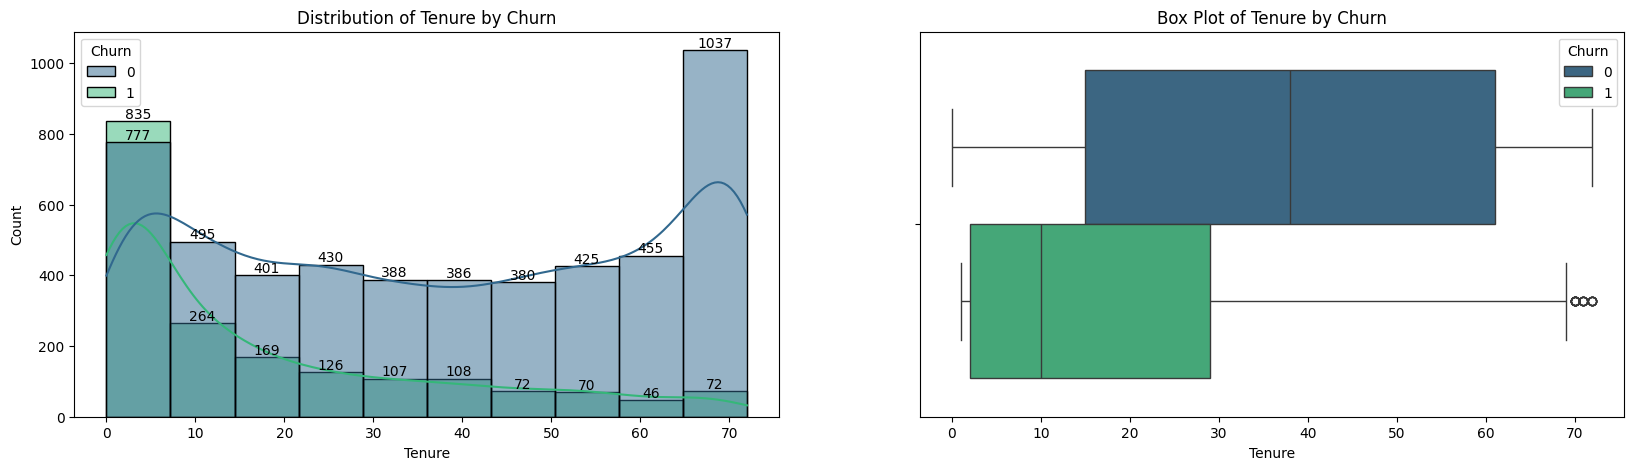

In [55]:
plt.figure(figsize=(20,5))

# Hist plot
ax = plt.subplot(1, 2, 1)
histplot = sns.histplot(data=df, x='tenure', kde=True, bins=10, hue='Churn', palette=color)

# Add labels
plt.xlabel('Tenure')
plt.ylabel('Count')

# Add values above the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.0f}', ha='center', va='bottom')

# You can also add a title if needed
plt.title('Distribution of Tenure by Churn')

# Box plot
ax = plt.subplot(1, 2, 2)
boxplot = sns.boxplot(data=df, x='tenure', hue='Churn', palette=color)

# Add labels
plt.xlabel('Tenure')

# You can also add a title if needed
plt.title('Box Plot of Tenure by Churn')

# Show the plot
plt.show()


A clear negative correlation exists between customer tenure and churn rate. Newer customers are more likely to churn, while long-term customers are less likely to. Reasons may include:

- New customers evaluate and reassess needs within the first year and may switch providers if unhappy.
- Long-time customers tend to be more satisfied and less willing to go through the effort of changing services.

The bar chart shows churn rate declines as tenure increases, with a sharp peak for 0-10 months. Churn then steadily drops, ending with the lowest rate for 60+ months. The box plot confirms this - 75% of churn occurs within 30 months, with the median churn happening by 10 months.

In summary, shorter-tenure customers, especially in the first year, have a higher propensity to churn, while longer-standing customers tend to be sticky. Both charts depict the significant downward trend in churn rate as customer tenure increases over time.

#### Phone Service

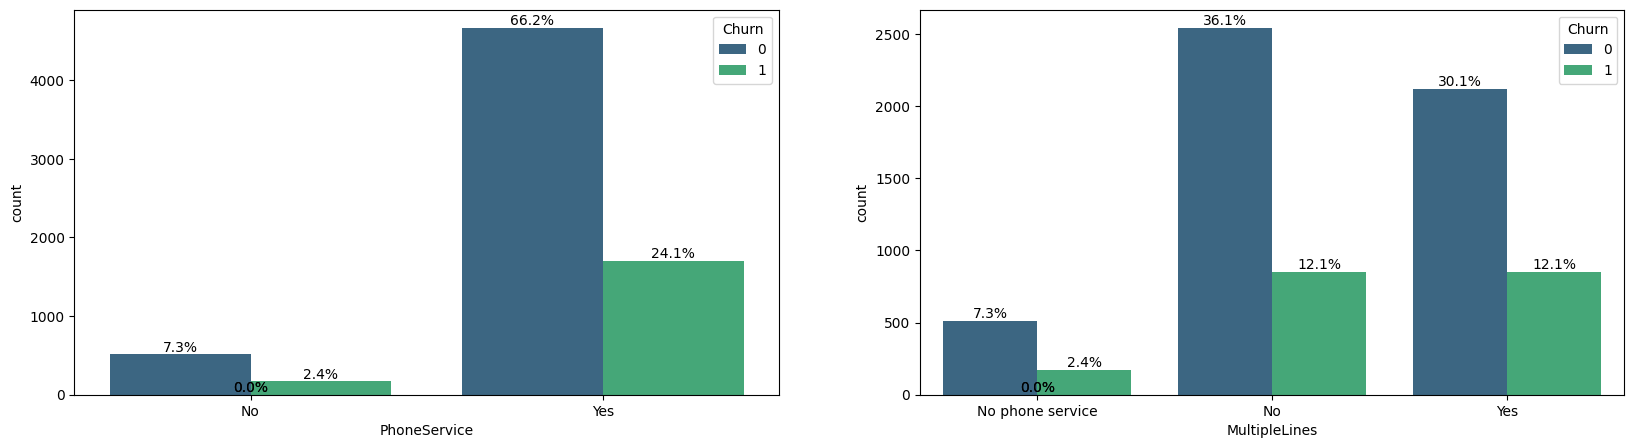

In [34]:
customer_phoneService = ['PhoneService', 'MultipleLines']
fig = plt.figure(figsize=(20,5))
fig.tight_layout()
for i in range(len(customer_phoneService)):
    ax = plt.subplot(1, 2, i + 1)
    sns.countplot(data=df, x=customer_phoneService[i], palette=color, hue='Churn')
    
    # Add percentage labels to each bar
    total_height = len(df[customer_phoneService[i]])  # total number of data points
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_height)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom');

- The Phone Service chart shows customers with phone service are more likely to stay at 66.2% retention versus 7.3% for those without. The churn rate is 24.1% with phone service and 2.4% without.

- The Multiple Lines chart compares retention between customers with multiple lines versus no multiple lines. Those with no multiple lines have higher retention at 36.1% non-churn rate versus 30.1% for multiple lines, although both have a 12.1% churn rate. Figures for customers without phone service are shown as percentages of the total customer base.

In summary, phone service customers have significantly stickier retention. Among those with service, multi-line customers retain at a slightly higher rate than single-line. Customers without any phone service have the least retention and lowest churn. The charts display percentages representing relative fractions of all customers.

#### Internet Service

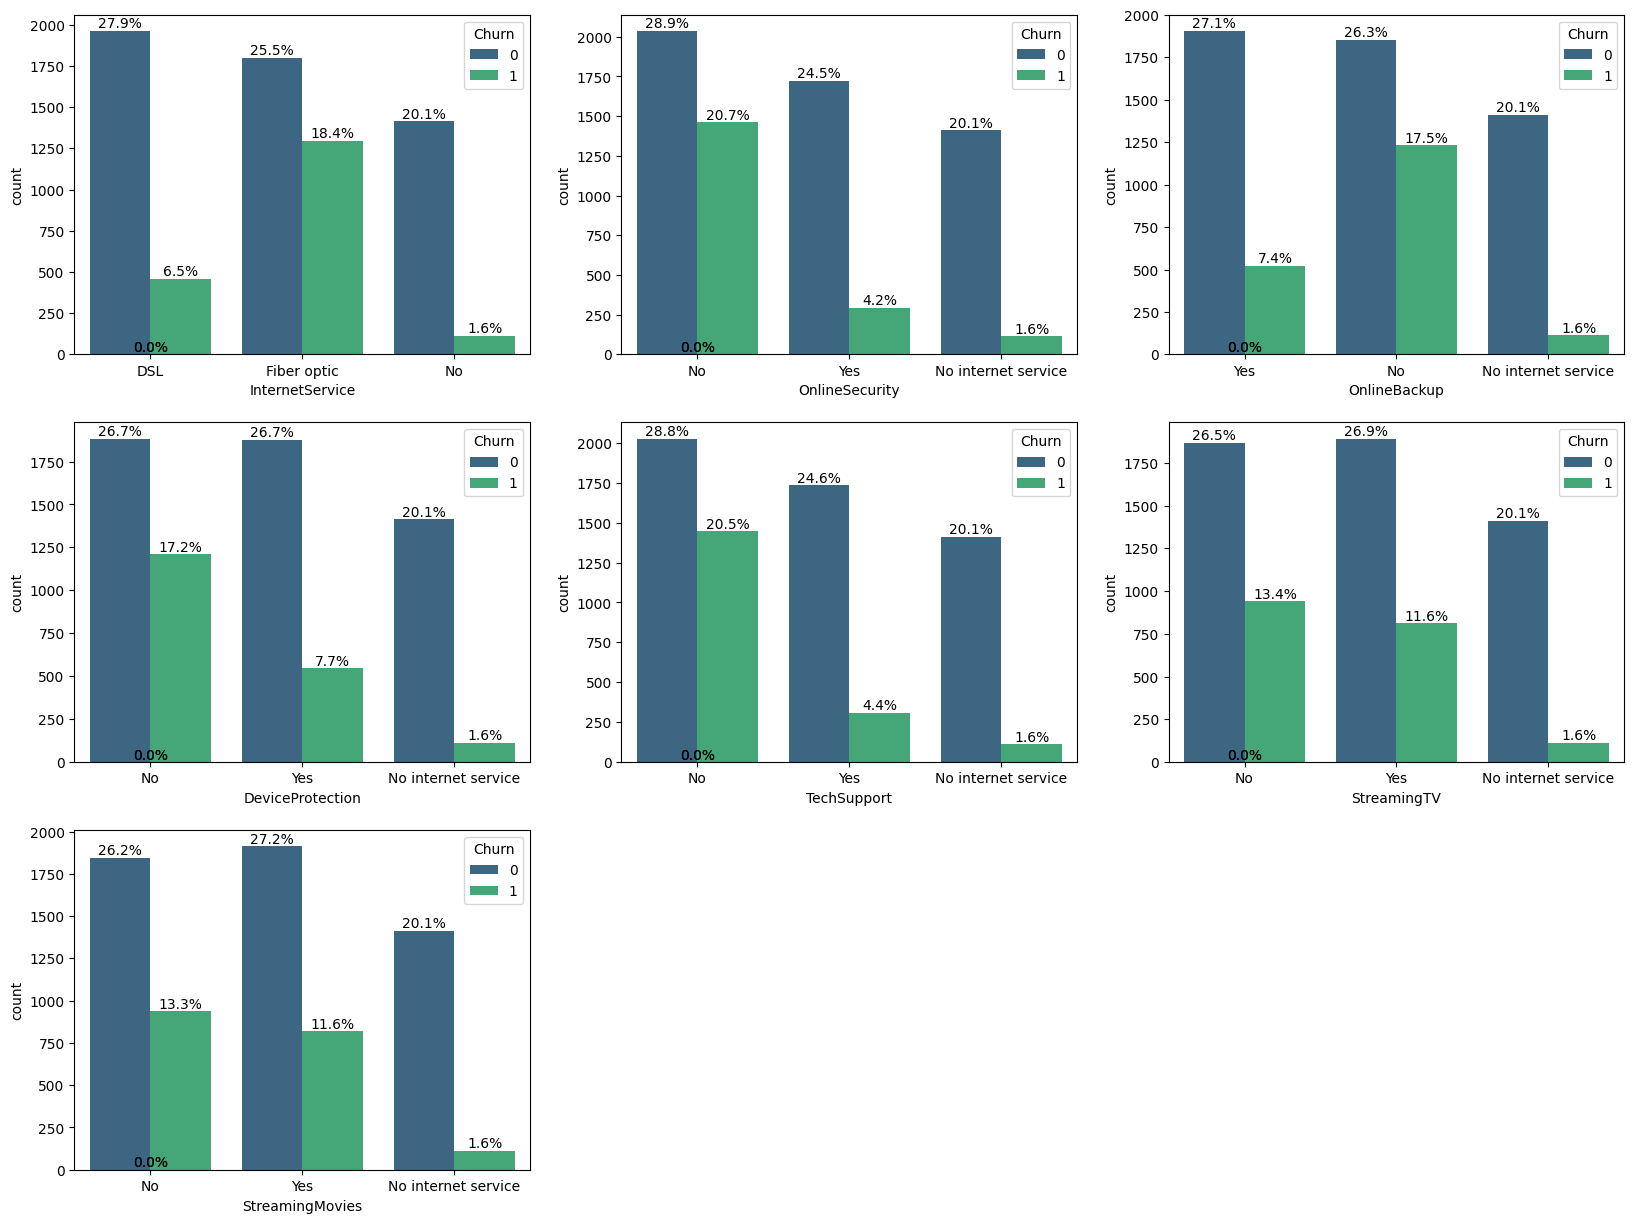

In [35]:
customer_services = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
fig = plt.figure(figsize=(20,15))
fig.tight_layout()
for i in range(len(customer_services)):
    ax = plt.subplot(3, 3, i + 1)
    sns.countplot(data=df, x=customer_services[i], palette=color, hue='Churn')
    
    # Add percentage labels to each bar
    total_height = len(df[customer_services[i]])  # total number of data points
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_height)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom');

### Internet Service and Upgraded Features Churn Rate Analysis

The Internet Service chart displays...DSL customers have the highest retention rate at 27.9% and 6.5% churn rate, compared to Fiber Optic at 25.5% retention and 18.4% churn. Customers without internet have 20.1% retention and 1.6% churn.

Figures for customers without internet are shown as percentages of the total customer base.

Key findings on churn rates for upgraded service features:

- Online Security - Large discrepancy in churn between those with security at 4.2% and without at 20.7%, showing high value of this feature.
- Online Backup - Similarly, 7.4% churn for those with backup versus 17.5% without indicates strong retention benefits.
- Device Protection - Significant gap as well, with 7.7% churn for protected customers versus 17.2% without protection.
- Tech Support - 4.4% churn with support versus 20.5% for those without demonstrates support's high retention impact.
- Streaming TV & Movies - 11.6% churn for both features, only slightly better than those without at 13.4% TV and 13.3% movies, suggesting less differentiation in value.

In summary, security, backup, and device protection strongly contribute to lower churn rates, while tech support also has high retention impact. Streaming entertainment has milder but still positive retention effects.

### Customer Billing 

`Contract, PaperlessBilling, PaymentMethod, MonthlyCarges, TotalCharges`

These features relate to customer billing details. Billing patterns can uncover links between pricing, contract terms, and customer loyalty.

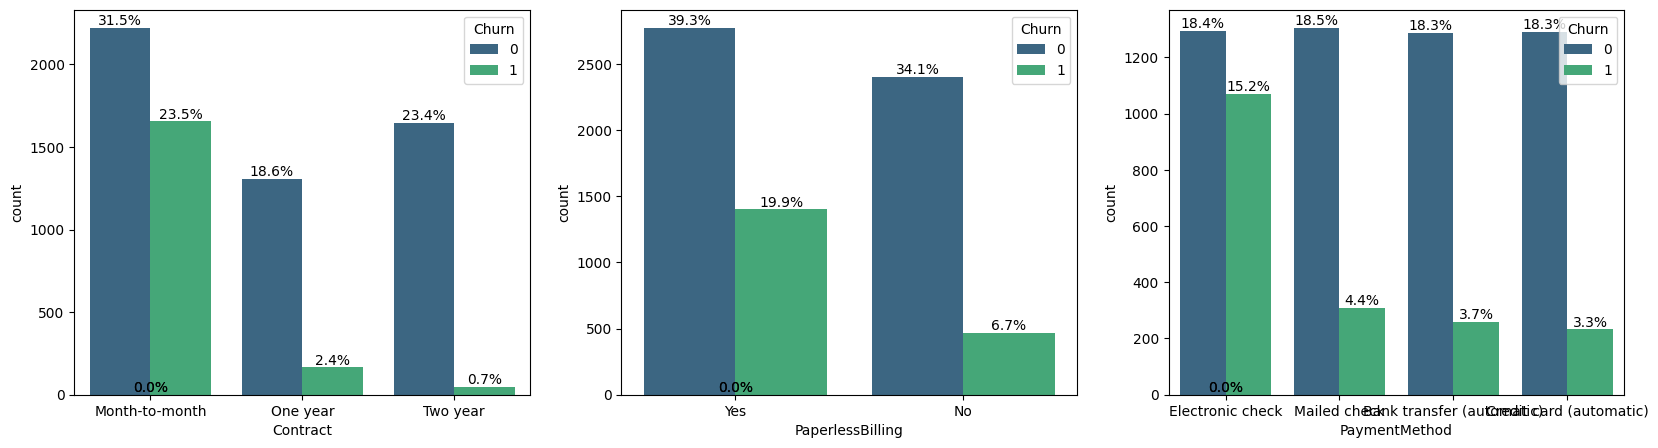

In [54]:
customer_billing_cat = ['Contract', 'PaperlessBilling', 'PaymentMethod']

fig = plt.figure(figsize=(20,5))
fig.tight_layout()
for i in range(len(customer_billing_cat)):
    ax = plt.subplot(1, 3, i + 1)
    sns.countplot(data=df, x=customer_billing_cat[i], palette=color, hue='Churn')
    
    # Add percentage labels to each bar
    total_height = len(df[customer_billing_cat[i]])  # total number of data points
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_height)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom');


- Month-to-month customers have the highest retention rate at 31.5% but also the highest churn rate at 23.5%, making them most likely to leave. One-year customers have lower 18.6% retention and 2.4% churn rates. Two-year customers have the lowest retention at 23.4% and churn at 0.7%.

- The Paperless Billing chart compares churn between customers with and without paperless billing. Customers without paperless billing have a 34.1% retention rate and 6.7% churn rate. With paperless billing, retention is higher at 39.3% but churn also increases to 19.9%.

- The Payment Method chart shows churn rates by electronic check, mailed check, bank transfer, and credit card. All methods have similar ~18.5% retention rates. Electronic check has the highest 15.2% churn rate. Mailed check churn is 4.4%. Bank transfer and credit card have the lowest churn at 3.7% and 3.3% respectively.

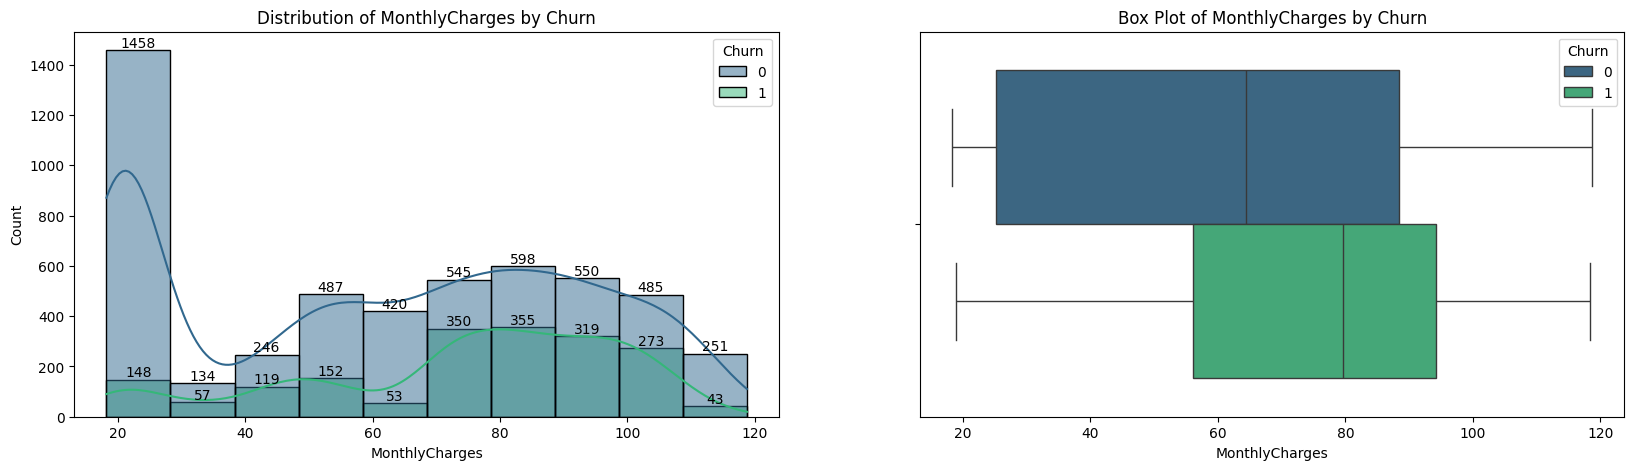

In [52]:
plt.figure(figsize=(20,5))

# Hist plot
ax = plt.subplot(1, 2, 1)
histplot = sns.histplot(data=df, x='MonthlyCharges', kde=True, bins=10, hue='Churn', palette=color)

# Add labels
plt.xlabel('MonthlyCharges')
plt.ylabel('Count')

# Add values above the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.0f}', ha='center', va='bottom')

# You can also add a title if needed
plt.title('Distribution of MonthlyCharges by Churn')

# Box plot
ax = plt.subplot(1, 2, 2)
boxplot = sns.boxplot(data=df, x='MonthlyCharges', hue='Churn', palette=color)

# Add labels
plt.xlabel('MonthlyCharges')

# You can also add a title if needed
plt.title('Box Plot of MonthlyCharges by Churn')

# Show the plot
plt.show()

The two graphs depict the relationship between monthly charges and customer churn. In the histogram on the left, a significant number of customers with lower monthly charges (20-30 range) are not churning (depicted in blue), while there is a noticeable but smaller peak of customers who do churn in this charge bracket (shown in green). As the monthly charges increase, both churning and non-churning customers decrease, with non-churning always being higher.

- The highest churn occurs at the higher charge bins, indicating price sensitivity.
- Non-churn is consistently higher across all charge, suggesting overall customer satisfaction.

The box plot on the right further illustrates this trend. Customers who do not churn (blue) have a median monthly charge around 60, while those who do churn (green) have a higher median around 80.

- The interquartile range for churning customers is narrower and skewed towards higher monthly charges.
- Non-churning customers exhibit a broader range of monthly charges.

In summary:

- Customers with higher monthly charges are more likely to churn.
- A broad range of monthly charges exists among non-churning customers, indicating diverse service utilization and satisfaction levels.


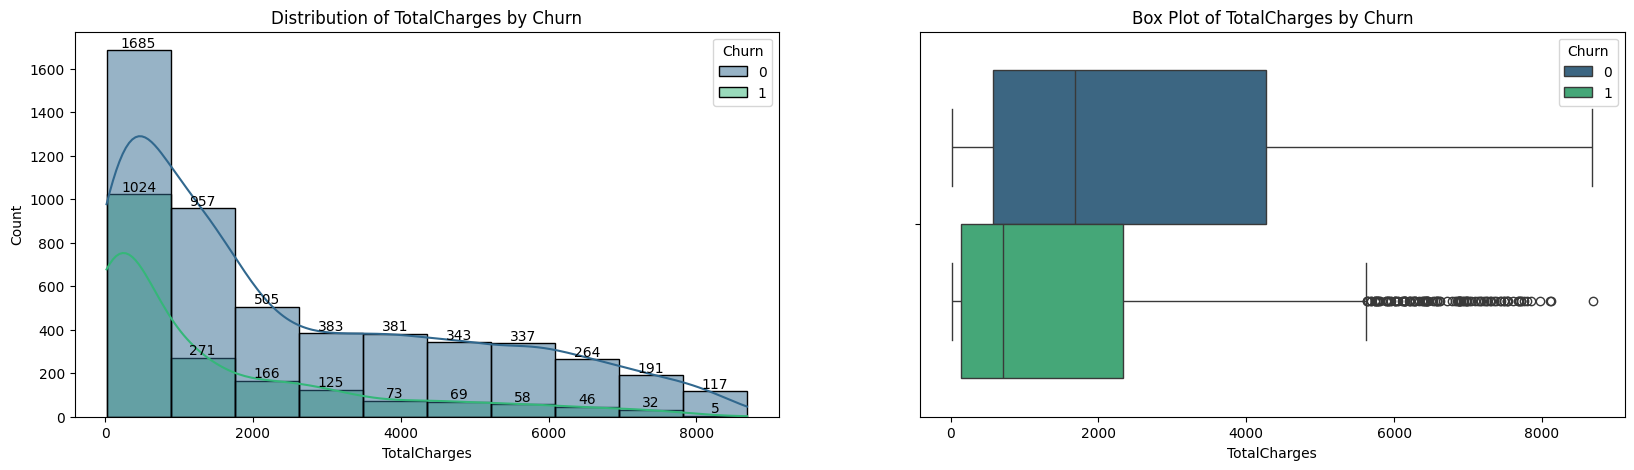

In [53]:
plt.figure(figsize=(20,5))

# Hist plot
ax = plt.subplot(1, 2, 1)
histplot = sns.histplot(data=df, x='TotalCharges', kde=True, bins=10, hue='Churn', palette=color)

# Add labels
plt.xlabel('TotalCharges')
plt.ylabel('Count')

# Add values above the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.0f}', ha='center', va='bottom')

# You can also add a title if needed
plt.title('Distribution of TotalCharges by Churn')

# Box plot
ax = plt.subplot(1, 2, 2)
boxplot = sns.boxplot(data=df, x='TotalCharges', hue='Churn', palette=color)

# Add labels
plt.xlabel('TotalCharges')

# You can also add a title if needed
plt.title('Box Plot of TotalCharges by Churn')

# Show the plot
plt.show()

The two graphs depict the relationship between total charges and customer churn. It shows that most data points for both churn values are clustered around the lower total charges values. In the boxplot, it’s evident that customers with higher total charges tend to have a churn value of 0 (indicated by blue), while those with lower total charges have a mix of churn values.

- The histogram suggests that customers who pay less are more likely to churn than those who pay more. 
- The boxplot confirms this trend by showing that the median total charges for customers who churn is lower than the median for those who do not churn. The interquartile range for customers who churn is also narrower and skewed towards lower total charges, and has some outliers at higher total charges, while the interquartile range for customers who do not churn is wider.

In summary, the graphs indicate that total charges are negatively correlated with customer churn. Customers with lower total charges are more prone to churn, while customers with higher total charges are more loyal. This could imply that customers who use more services or have longer contracts are more satisfied and less likely to switch providers.

# Data Transformation

In [117]:
# transforming the 'Churn' column from categorical values ('Yes' and 'No') to numerical values (1 and 0),
# 'Yes' is mapped to 1, and 'No' is mapped to 0
df.Churn = df.Churn.map({'Yes': 1, 'No': 0})

In [ ]:
# Importing the zscore function from the scipy.stats module
from scipy.stats import zscore

# List of numerical columns that need to be standardized using z-score normalization
# Applying z-score normalization to the specified numerical columns.
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols] = df[num_cols].apply(zscore)

In [ ]:
# Perform one-hot encoding on categorical columns.
df_dummies = pd.get_dummies(df.iloc[:, 1:])

In [219]:
# Extracting features (X) and target variable (y)
X = df_dummies.drop(columns=['Churn'])
y = df_dummies['Churn']

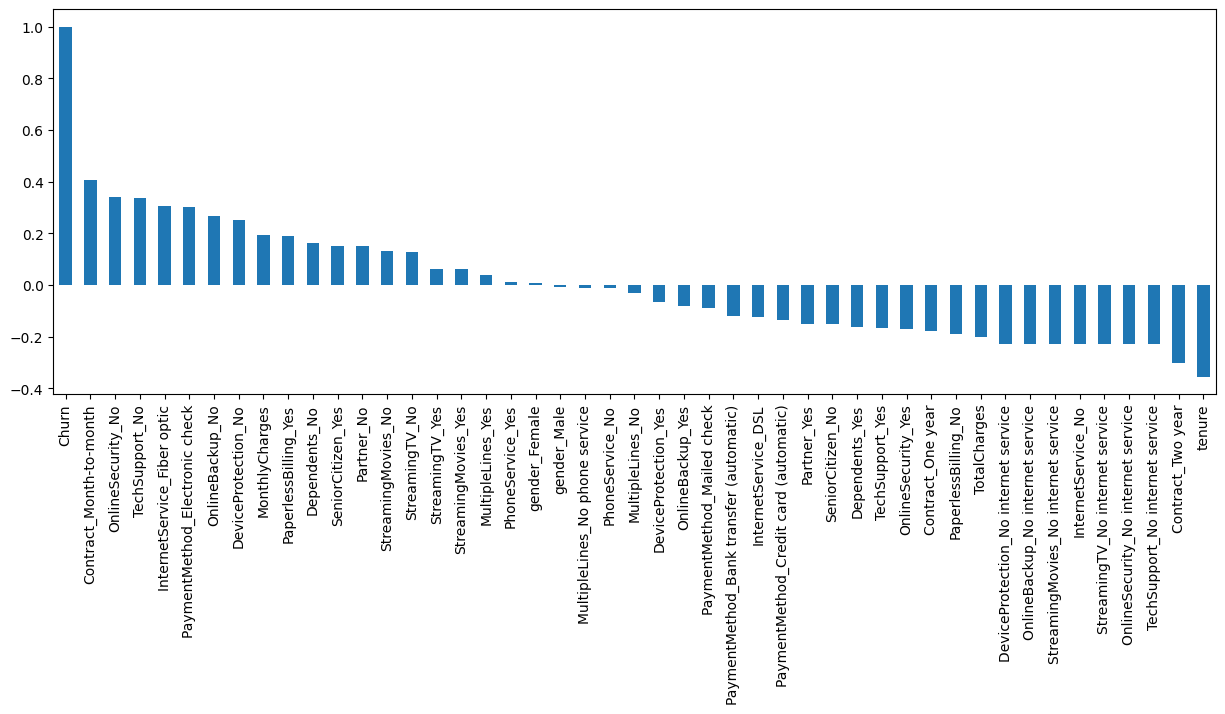

In [123]:
# Plotting the sorted correlation values as a bar chart
plt.figure(figsize=(15,5))
df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar', color='tab:blue');

# Predictive Modeling

### Train and Test Data Split 

In [220]:
# import libraries for model building, training, and testing
from sklearn.model_selection import train_test_split

# train_test_split
# --------------------------------------
# Split arrays or matrices into random train and test subsets.
# More info: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# 75:25 dataframe train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 13, stratify = y)

print("train_test_split")
print("--------------------------------------")
print("Train -> X_train : " + str(X_train.shape) + " | y_train : " + str(y_train.shape))
print("Test  -> X_test  : " + str(X_test.shape) + " | y_test  : " + str(y_test.shape))

train_test_split
--------------------------------------
Train -> X_train : (5625, 46) | y_train : (5625,)
Test  -> X_test  : (1407, 46) | y_test  : (1407,)


### Model Evaluation Metrics

In [125]:
# import sklear libraries for model evaluation
from sklearn import metrics

# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.utils.multiclass import unique_labels

# model performance evaluation
def model_Performance(model):
    
    # Training and testing prediction
    pred_train = model.predict(X_train)
    pred_test  = model.predict(X_test)

    # Accuracy score
    # The accuracy_score function computes the accuracy, either the fraction (default) 
    # or the count (normalize=False) of correct predictions. In multilabel classification, 
    # the function returns the subset accuracy. If the entire set of predicted labels for a 
    # sample strictly match with the true set of labels, then the subset accuracy is 1.0; 
    # otherwise it is 0.0.
    
    as_train = metrics.accuracy_score(y_train, pred_train)  
    as_test  = metrics.accuracy_score(y_test, pred_test)

    # F1 score
    # Also known as balanced F-score or F-measure. can be interpreted as a harmonic mean of the precision and 
    # recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative 
    # contribution of precision and recall to the F1 score are equal.
    
    f1_train = metrics.f1_score(y_train, pred_train)
    f1_test  = metrics.f1_score(y_test, pred_test)

    # Precision Score 
    # The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp 
    # the number of false positives. The precision is intuitively the ability of the classifier 
    # not to label as positive a sample that is negative. 
    # The best value is 1 and the worst value is 0.

    ps_train = metrics.precision_score(y_train, pred_train)
    ps_test  = metrics.precision_score(y_test, pred_test)

    # Recall Score 
    # The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn 
    # the number of false negatives. The recall is intuitively the ability of the classifier 
    # to find all the positive samples. 
    # The best value is 1 and the worst value is 0.

    re_train = metrics.recall_score(y_train, pred_train)
    re_test  = metrics.recall_score(y_test, pred_test)


    # printing performance matrics
    print('Model Perfromance: ' + str(model))
    print("--------------------------------------")
    print("Train data set ->  Accuracy: %0.3f   |   F1 score: %0.3f    |    Precision: %0.3f    |   Recall: %0.3f" % (as_train, f1_train, ps_train, re_train))
    print("Test data set  ->  Accuracy: %0.3f   |   F1 score: %0.3f    |    Precision: %0.3f    |   Recall: %0.3f" % (as_test, f1_test, ps_test, re_test))


### Ploting Feature's Importance

In [ ]:
# ploting feature's importance
def featureImportance_plot(model):
   
    importances = model.feature_importances_
    columns = X.columns
    importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by='Importance', ascending = False)
    # print(importance_df)
    
    #ploting feature importance chart
    plt.figure(figsize=(20, 5))
    sns.barplot(x=importance_df.Importance[:9], y=importance_df.index[:9], palette=color, hue=importance_df.Importance[:9], legend=False)
    plt.title('Top 10 - Feature Importance')
    plt.xlabel('Coeficient Importance')
    plt.ylabel('Features')

### Logistic Regression Classification

In [176]:
# logistic regression classification
# --------------------------------------
# Statistical model that predicts the probability of a binary outcome (such as yes or no, pass or fail, etc.) 
# based on one or more input variables (such as age, gender, test score, etc.). It uses a mathematical function 
# called the logistic function to transform the linear combination of the input variables into a probability value between 0 and 1.

from sklearn.linear_model import LogisticRegression

# Model definition and fitting
lrc = LogisticRegression()
lrc.fit(X_train, y_train)

# Model Performance
model_Performance(lrc)

Model Perfromance: LogisticRegression()
--------------------------------------
Train data set ->  Accuracy: 0.805   |   F1 score: 0.599    |    Precision: 0.662    |   Recall: 0.547
Test data set  ->  Accuracy: 0.817   |   F1 score: 0.616    |    Precision: 0.695    |   Recall: 0.553


### DecisionTree Classifier

In [126]:
# DecisionTreeClassifier
# --------------------------------------
# A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), 
# the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a 
# decision tree is known as the root node. It learns to partition on the basis of the attribute value.

from sklearn.tree import DecisionTreeClassifier

# Model definition and fitting
dtc = DecisionTreeClassifier(ccp_alpha = 0.001, criterion = 'entropy', max_depth = None, max_features = 20, min_samples_split = 2)
dtc.fit(X_train, y_train)

# Model Performance
model_Performance(dtc)

Model Perfromance: DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_features=20)
--------------------------------------
Train data set ->  Accuracy: 0.804   |   F1 score: 0.617    |    Precision: 0.641    |   Recall: 0.596
Test data set  ->  Accuracy: 0.796   |   F1 score: 0.595    |    Precision: 0.630    |   Recall: 0.564


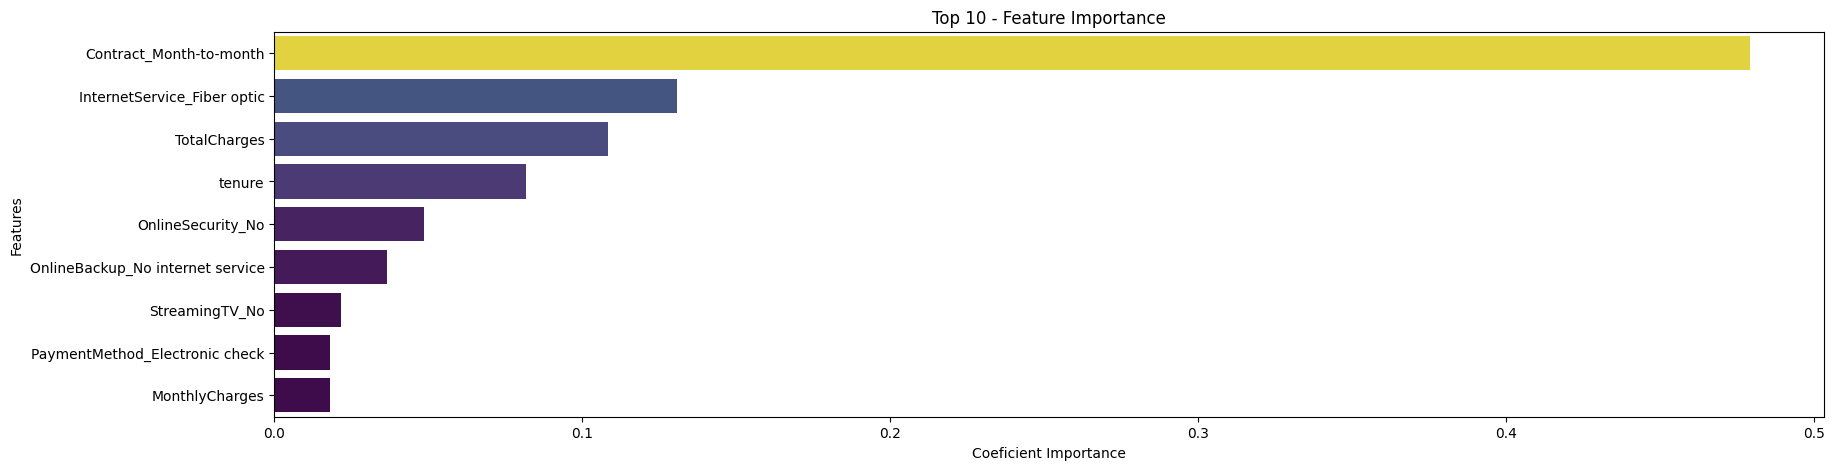

In [170]:
featureImportance_plot(dtc)

### RandomForestClassifier

Model Perfromance: RandomForestClassifier(ccp_alpha=0.0001, max_depth=20, max_features=15,
                       n_estimators=220, random_state=100)
--------------------------------------
Train data set ->  Accuracy: 0.997   |   F1 score: 0.995    |    Precision: 0.997    |   Recall: 0.993
Test data set  ->  Accuracy: 0.812   |   F1 score: 0.597    |    Precision: 0.693    |   Recall: 0.524


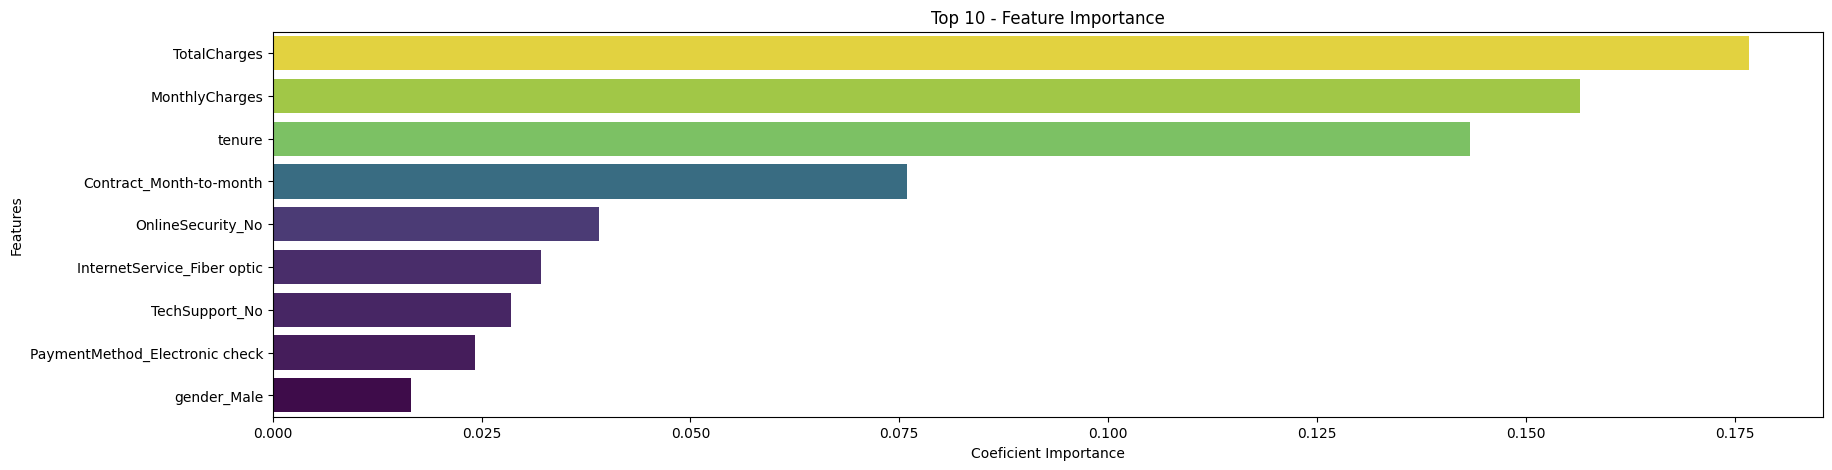

In [171]:
# RandomForestClassifier
# --------------------------------------
# it generates small decision trees using random subsamples of the dataset where the collection 
# of the generated decision tree is defined as forest. Every individual tree is created using 
# an attribute selection indicator such as entropy, information gain, etc. In classification, 
# problem voting is done by each tree and the most voted class is considered the final result 

from sklearn.ensemble import RandomForestClassifier

# Model definition and fitting
rfc = RandomForestClassifier(ccp_alpha = 0.0001, n_estimators = 220, max_depth = 20, max_features = 15, random_state = 100)
rfc.fit(X_train, y_train)

# Model Performance
model_Performance(rfc)
featureImportance_plot(rfc)

### XGBClassifier

In [186]:
from xgboost import XGBClassifier
# XGBoost, short for eXtreme Gradient Boosting, is a powerful and efficient machine learning algorithm used for
# both classification and regression tasks. It belongs to the ensemble learning category, specifically gradient 
# boosting frameworks. XGBoost builds a series of decision trees sequentially, where each new tree corrects the 
# errors made by the previous ones.

# Model definition and fitting
xgb = XGBClassifier(verbosity=0)
xgb.fit(X_train, y_train)

# Model Performance
model_Performance(xgb)


Model Perfromance: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
--------------------------------------
Train data set ->  Accuracy: 0.941   |   F1 score: 0.886    |    Precision: 0.909    |   Recall: 0.864
Test data set  ->  Accuracy: 0.788   |   F1 score: 0.563    |    Precision: 0.623

### Cross Validation

In [182]:
# Cross-validation:
# --------------------------------------
# Cross-validation is a resampling method that uses n portions of the data to test and train 
# a model on n iterations. It is mainly used in settings where the goal is prediction, 
# and one wants to estimate how accurately a predictive model will perform in practice.
# More info: https://scikit-learn.org/stable/modules/cross_validation.html

from sklearn.model_selection import cross_val_score

# import warnings library to silence some obsolete elements, such as keyword, function or class, etc.
import warnings
warnings.filterwarnings("ignore")

print("cross_val_score")
print("--------------------------------------")
for clf, label in zip([lrc, dtc, rfc, xgb], ['LogisticRegressionClassifier', 'DecisionTreeClassifier','RandomForestClassifier', 'XGBClassifier']):
    scores = cross_val_score(clf, X, y, scoring = 'accuracy', cv = 5)
    print("Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label));

cross_val_score
--------------------------------------
Accuracy: 0.803 (+/- 0.008) [LogisticRegressionClassifier]
Accuracy: 0.790 (+/- 0.008) [DecisionTreeClassifier]
Accuracy: 0.787 (+/- 0.011) [RandomForestClassifier]
Accuracy: 0.780 (+/- 0.011) [XGBClassifier]


### Cross Validation Reults:

1. The LogisticRegressionClassifier performed the best with the highest mean accuracy of 0.803 (+/- 0.008) across the folds, indicating it was the most accurate and consistent. 
2. The DecisionTreeClassifier and RandomForestClassifier showed similar performance with mean accuracies of 0.790 (+/- 0.008) and 0.787 (+/- 0.011) respectively. 
3. The XGBClassifier performed worse than the rest with the lowest mean accuracy of 0.780 (+/- 0.011) and the highest variability. 

In summary, the cross validation identified the LogisticRegressionClassifier as the top performing model out of those tested on this particular dataset when evaluated on accuracy.

### ROC AUC Graphic Evaluation

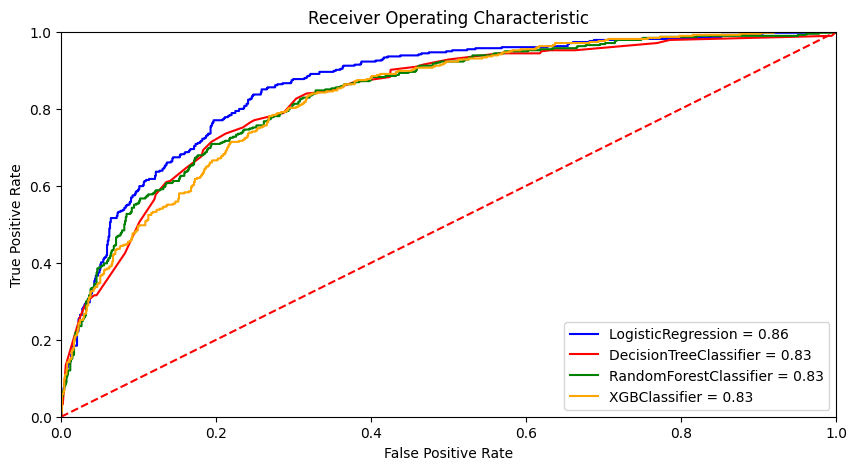

In [247]:
#define metrics
model = [lrc, dtc, rfc, xgb]
colors = ['blue', 'red', 'green', 'orange']

#create ROC curve plot
plt.figure(figsize=(10, 5))
plt.title('Receiver Operating Characteristic')

for m, i in zip(model, range(len(colors))):
    y_pred_proba = m.predict_proba(X_test)[:,1]
    y_pred_proba
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, colors[i], label='%s = %0.2f' % (type(m).__name__, roc_auc))
    plt.legend(loc = 'lower right')
    
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


 
The best classifier is the one that has the highest true positive rate at the lowest false positive rate, which is equivalent to having the largest area under the curve (AUC).

- Based on the AUC scores, Logistic Regression is the most effective classifier among the four, with an AUC of 0.86. 
- The other three classifiers have similar AUCs of 0.83, indicating that they are less accurate and consistent than Logistic Regression. 

All classifiers perform better than the line of no discrimination, which represents a random guess, but there is still room for improvement to achieve a higher true positive rate at a lower false positive rate.

# Conclusion

Customer analytics examines customer information to uncover patterns and behaviors that provide actionable insights, increasing customer loyalty and profitability. For this telecom company, analyses of demographics, account details, and billing uncovered several key findings:

1. High-risk groups for churn include newly acquired customers, seniors, and those on month-to-month contracts.
2. There is a negative correlation between tenure length and churn rates. Service add-ons like security, backup, and device protection have a high impact on retention.
3. Customers with high monthly charges have 30% higher churn rates.

Based on these insights, recommendations may headed to targeting retention offers for short-term customers, development of bundled packages and senior discounts, and revising pricing/contracts around month-to-month customers. Additionally, a predictive retention model would enable more proactive retention efforts.

In summary, these analyses uncovered actionable patterns. By addressing these areas, the company could significantly increase retention rates and earnings through data-driven decisions. While the study focused on a small dataset, it shows how customer analytics integrates into strategy, directly strengthening competitive advantage across customer-centric industries.